In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("Food-Truck-LineReg.csv", names = ['X', 'Y'])
df.head()

,X,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [52]:
df['XY'] = df['X'] * df['Y']
df['X2'] = df['X'] ** 2

n = len(df['X'])

a = ((n*(df['XY'].sum())) - (df['X'].sum()*df['Y'].sum()))/((n*(df['X2'].sum())) - (df['X'].sum() ** 2))
b = (df['Y'].sum() - (a*df['X'].sum()))/n

print(df.head())
print(f'\nSlope a : {a}')
print(f'Intercept b : {b}')

        X        Y          XY         X2    Y_pred          E          E2
0  6.1101  17.5920  107.488879  37.333322  3.393774  14.198226  201.589622
1  5.5277   9.1302   50.469007  30.555467  2.698951   6.431249   41.360961
2  8.5186  13.6620  116.381113  72.566546  6.267196   7.394804   54.683133
3  7.0032  11.8540   83.015933  49.044810  4.459272   7.394728   54.681997
4  5.8598   6.8233   39.983173  34.337256  3.095158   3.728142   13.899045

Slope a : 1.1930336441895943
Intercept b : -3.8957808783118595


In [49]:
df['Y_pred'] = (a*df['X'] + b)
df['E'] = df['Y'] - df['Y_pred']
df['E2'] = df['E'] ** 2

SSE = df['E2'].sum()
SST = ((df['Y'] - df['Y'].mean()) ** 2).sum()
SSR = ((df['Y_pred'] - df['Y_pred'].mean()) ** 2).sum()
R2 = SSR / SST
cost = SSE / len(df['X'])

print(df.head())
print(f'\nSSE : {SSE:.15f}')
print(f'SST : {SST:.15f}')
print(f'SSR : {SSR:.15f}')
print(f'R2 : {R2:.15f}')
print(f'cost : {cost:.15f}')

        X        Y          XY         X2    Y_pred          E          E2
0  6.1101  17.5920  107.488879  37.333322  3.393774  14.198226  201.589622
1  5.5277   9.1302   50.469007  30.555467  2.698951   6.431249   41.360961
2  8.5186  13.6620  116.381113  72.566546  6.267196   7.394804   54.683133
3  7.0032  11.8540   83.015933  49.044810  4.459272   7.394728   54.681997
4  5.8598   6.8233   39.983173  34.337256  3.095158   3.728142   13.899045

SSE : 868.532446939184524
SST : 2914.847051657224711
SSR : 2046.314604718042119
R2 : 0.702031553784140
cost : 8.953942751950356


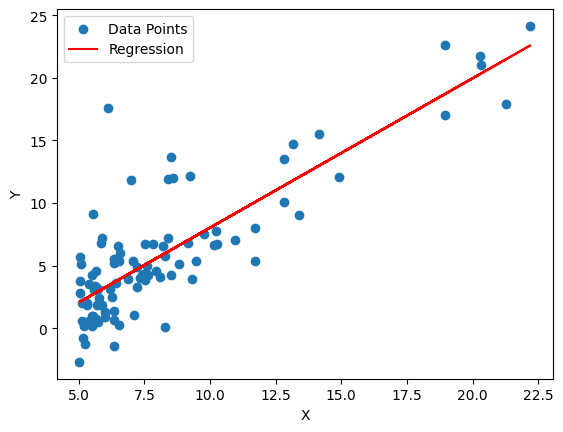

In [56]:
plt.figure()
plt.scatter(df['X'], df['Y'], label='Data Points')
plt.plot(df['X'], df['Y_pred'], color='r', label='Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [53]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f